In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

from eda_utils import *

In [2]:
# set path
import os
os.chdir('..')

In [3]:
# set params for matplotlib and seaborn
set_params()

# get data
data = get_data()

# preprocess data
data = preprocess_data(data)

data

   AmountSold_by_Kilo  AvgPrice_per_Kilo  YearNum  MonthNum FishGroup Country
0         2385.445111           6.900461     2023         1       Cod     USA
1          215.003039           3.703762     2023         1   Haddock     USA
2           32.658689           3.924224     2023         1       Cod     USA
3         5855.430868           5.114718     2023         1   Haddock     USA
4         1518.629061           5.555642     2023         1      Hake     USA
OUTLIERS:
      YYYY/MM FishGroup    Country  AmountSold_by_Kilo  AvgPrice_per_Kilo  \
2340  2022-03       Cod  FAROE IS.                64.0               75.0   

     Imported  
2340      Yes  


,YYYY/MM,FishGroup,Country,AmountSold_by_Kilo,AvgPrice_per_Kilo,Imported
0,2004-01,Cod,USA,37891.790876,4.419322,No
1,2004-01,Haddock,USA,24066.278996,3.743735,No
2,2004-01,Hake,USA,103171.068030,2.091564,No
3,2004-01,Pollock,USA,56597.962461,1.410748,No
4,2004-01,Redfish,USA,6455.987880,1.807788,No
...,...,...,...,...,...,...
2662,2024-01,Haddock,FAROE IS.,92694.000000,3.702699,Yes
2663,2024-01,Haddock,ICELAND,436025.000000,8.873429,Yes
2664,2024-01,Haddock,NORWAY,578762.000000,3.324736,Yes
2665,2024-01,Hake,SPAIN,2605.000000,3.795777,Yes


In [4]:
data.groupby('Country')['AvgPrice_per_Kilo'].mean().sort_values(ascending=False)

Country
LATVIA                16.000689
NORWAY                 8.782617
GREENLAND              8.125947
ICELAND                7.697597
DENMARK                6.961678
NETHERLANDS            6.770562
GERMANY                6.714913
UNITED KINGDOM         6.400373
RUSSIAN FEDERATION     6.250318
POLAND                 6.234752
FAROE IS.              4.041017
USA                    3.745200
FRANCE                 3.661809
PORTUGAL               3.491549
SPAIN                  3.373768
ITALY                  3.168689
SWEDEN                 3.090004
MONTENEGRO             2.164168
GREECE                 2.092404
LITHUANIA              1.824148
UKRAINE                1.792243
ALBANIA                1.750000
BOSNIA-HERCEGOVINA     1.695254
CROATIA                1.552619
ROMANIA                1.533385
BULGARIA               1.461316
SERBIA & KOSOVO        1.347740
IRELAND                0.975000
Name: AvgPrice_per_Kilo, dtype: float64

In [5]:
countries = data['Country'].value_counts()[1:4].index.values
countries

array(['ICELAND', 'NORWAY', 'RUSSIAN FEDERATION'], dtype=object)

In [6]:
data_filtered = data[data['Country'].isin(['USA', 'ICELAND', 'NORWAY', 'RUSSIAN FEDERATION'])]
data_filtered

,YYYY/MM,FishGroup,Country,AmountSold_by_Kilo,AvgPrice_per_Kilo,Imported
0,2004-01,Cod,USA,37891.790876,4.419322,No
1,2004-01,Haddock,USA,24066.278996,3.743735,No
2,2004-01,Hake,USA,103171.068030,2.091564,No
3,2004-01,Pollock,USA,56597.962461,1.410748,No
4,2004-01,Redfish,USA,6455.987880,1.807788,No
...,...,...,...,...,...,...
2660,2024-01,Cod,ICELAND,547613.000000,10.672972,Yes
2661,2024-01,Cod,NORWAY,132717.000000,5.831393,Yes
2663,2024-01,Haddock,ICELAND,436025.000000,8.873429,Yes
2664,2024-01,Haddock,NORWAY,578762.000000,3.324736,Yes


In [7]:
# Drop the 'Country' column
data_without_country = data_filtered.drop('Country', axis=1)

# Create a unique identifier for each fish group by its import status
data_without_country['FishGroup_ImportStatusValue'] = np.where(data_without_country['Imported'] == 'Yes',
                                                          data_without_country['FishGroup'] + "_Imported_USD",
                                                          data_without_country['FishGroup'] + "_Domestic_USD")

# Create a unique identifier for each fish group by its import status
data_without_country['FishGroup_ImportStatusAmount'] = np.where(data_without_country['Imported'] == 'Yes',
                                                          data_without_country['FishGroup'] + "_Imported_Kilos",
                                                          data_without_country['FishGroup'] + "_Domestic_Kilos")

# Pivot the table to have dates as rows and the unique fish group import statuses as columns, with average prices as values
df_value = data_without_country.pivot_table(index='YYYY/MM', 
                                               columns='FishGroup_ImportStatusValue', 
                                               values='AvgPrice_per_Kilo',
                                               aggfunc='mean')
# Pivot the table to have dates as rows and the unique fish group import statuses as columns, with average prices as values
df_amount = data_without_country.pivot_table(index='YYYY/MM', 
                                               columns='FishGroup_ImportStatusAmount', 
                                               values='AmountSold_by_Kilo',
                                               aggfunc='sum')


In [8]:
data_without_country['FishGroup_ImportStatusAmount'].unique()

array(['Cod_Domestic_Kilos', 'Haddock_Domestic_Kilos',
       'Hake_Domestic_Kilos', 'Pollock_Domestic_Kilos',
       'Redfish_Domestic_Kilos', 'Cod_Imported_Kilos',
       'Haddock_Imported_Kilos', 'Pollock_Imported_Kilos',
       'Hake_Imported_Kilos', 'Redfish_Imported_Kilos'], dtype=object)

In [9]:
df_value

FishGroup_ImportStatusValue,Cod_Domestic_USD,Cod_Imported_USD,Haddock_Domestic_USD,Haddock_Imported_USD,Hake_Domestic_USD,Hake_Imported_USD,Pollock_Domestic_USD,Pollock_Imported_USD,Redfish_Domestic_USD,Redfish_Imported_USD
YYYY/MM,,,,,,,,,,
2004-01,4.419322,NaN,3.743735,NaN,2.091564,NaN,1.410748,NaN,1.807788,NaN
2004-02,3.637451,NaN,2.893345,NaN,1.658112,NaN,1.519010,NaN,1.124356,NaN
2004-03,3.444920,NaN,3.208133,NaN,2.035425,NaN,1.737086,NaN,1.455049,NaN
2004-04,3.179624,NaN,2.655904,NaN,3.226395,NaN,1.884585,NaN,1.455049,NaN
2004-05,3.937936,NaN,2.268643,NaN,1.743420,NaN,1.224154,NaN,1.521188,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-09,7.832365,10.271607,4.656625,6.936796,5.330927,NaN,6.659265,4.950753,1.433003,NaN
2023-10,5.584164,11.177861,4.012876,6.809827,3.343172,NaN,5.567629,NaN,1.300726,1.797368
2023-11,6.185745,9.389704,3.788009,6.481896,4.816630,NaN,5.883270,7.323531,1.631419,NaN


In [10]:
df_amount

FishGroup_ImportStatusAmount,Cod_Domestic_Kilos,Cod_Imported_Kilos,Haddock_Domestic_Kilos,Haddock_Imported_Kilos,Hake_Domestic_Kilos,Hake_Imported_Kilos,Pollock_Domestic_Kilos,Pollock_Imported_Kilos,Redfish_Domestic_Kilos,Redfish_Imported_Kilos
YYYY/MM,,,,,,,,,,
2004-01,37891.790876,NaN,24066.278996,NaN,103171.068030,NaN,56597.962461,NaN,6455.987880,NaN
2004-02,57071.967051,NaN,120841.687003,NaN,139801.417024,NaN,120811.749871,NaN,15452.549646,NaN
2004-03,94923.388158,NaN,80199.308724,NaN,160185.428781,NaN,174808.810589,NaN,11291.288295,NaN
2004-04,114840.199218,NaN,117251.499125,NaN,99076.031243,NaN,146683.328646,NaN,10003.538025,NaN
2004-05,46999.029311,NaN,30582.594733,NaN,149485.625641,NaN,114421.986556,NaN,6784.842739,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-09,982.482242,550803.0,12261.069935,435693.0,15318.286145,NaN,2497.936152,3919.0,1044.624470,NaN
2023-10,2737.886801,378040.0,10651.722292,485924.0,13815.986429,NaN,14582.558445,NaN,423.655777,48107.0
2023-11,1918.244414,522584.0,7394.018017,915477.0,6911.848754,NaN,9647.013998,29212.0,53.977556,NaN


In [11]:
df_combined = df_value.join(df_amount)
df_combined

,Cod_Domestic_USD,Cod_Imported_USD,Haddock_Domestic_USD,Haddock_Imported_USD,Hake_Domestic_USD,Hake_Imported_USD,Pollock_Domestic_USD,Pollock_Imported_USD,Redfish_Domestic_USD,Redfish_Imported_USD,Cod_Domestic_Kilos,Cod_Imported_Kilos,Haddock_Domestic_Kilos,Haddock_Imported_Kilos,Hake_Domestic_Kilos,Hake_Imported_Kilos,Pollock_Domestic_Kilos,Pollock_Imported_Kilos,Redfish_Domestic_Kilos,Redfish_Imported_Kilos
YYYY/MM,,,,,,,,,,,,,,,,,,,,
2004-01,4.419322,NaN,3.743735,NaN,2.091564,NaN,1.410748,NaN,1.807788,NaN,37891.790876,NaN,24066.278996,NaN,103171.068030,NaN,56597.962461,NaN,6455.987880,NaN
2004-02,3.637451,NaN,2.893345,NaN,1.658112,NaN,1.519010,NaN,1.124356,NaN,57071.967051,NaN,120841.687003,NaN,139801.417024,NaN,120811.749871,NaN,15452.549646,NaN
2004-03,3.444920,NaN,3.208133,NaN,2.035425,NaN,1.737086,NaN,1.455049,NaN,94923.388158,NaN,80199.308724,NaN,160185.428781,NaN,174808.810589,NaN,11291.288295,NaN
2004-04,3.179624,NaN,2.655904,NaN,3.226395,NaN,1.884585,NaN,1.455049,NaN,114840.199218,NaN,117251.499125,NaN,99076.031243,NaN,146683.328646,NaN,10003.538025,NaN
2004-05,3.937936,NaN,2.268643,NaN,1.743420,NaN,1.224154,NaN,1.521188,NaN,46999.029311,NaN,30582.594733,NaN,149485.625641,NaN,114421.986556,NaN,6784.842739,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09,7.832365,10.271607,4.656625,6.936796,5.330927,NaN,6.659265,4.950753,1.433003,NaN,982.482242,550803.0,12261.069935,435693.0,15318.286145,NaN,2497.936152,3919.0,1044.624470,NaN
2023-10,5.584164,11.177861,4.012876,6.809827,3.343172,NaN,5.567629,NaN,1.300726,1.797368,2737.886801,378040.0,10651.722292,485924.0,13815.986429,NaN,14582.558445,NaN,423.655777,48107.0
2023-11,6.185745,9.389704,3.788009,6.481896,4.816630,NaN,5.883270,7.323531,1.631419,NaN,1918.244414,522584.0,7394.018017,915477.0,6911.848754,NaN,9647.013998,29212.0,53.977556,NaN


<Axes: >

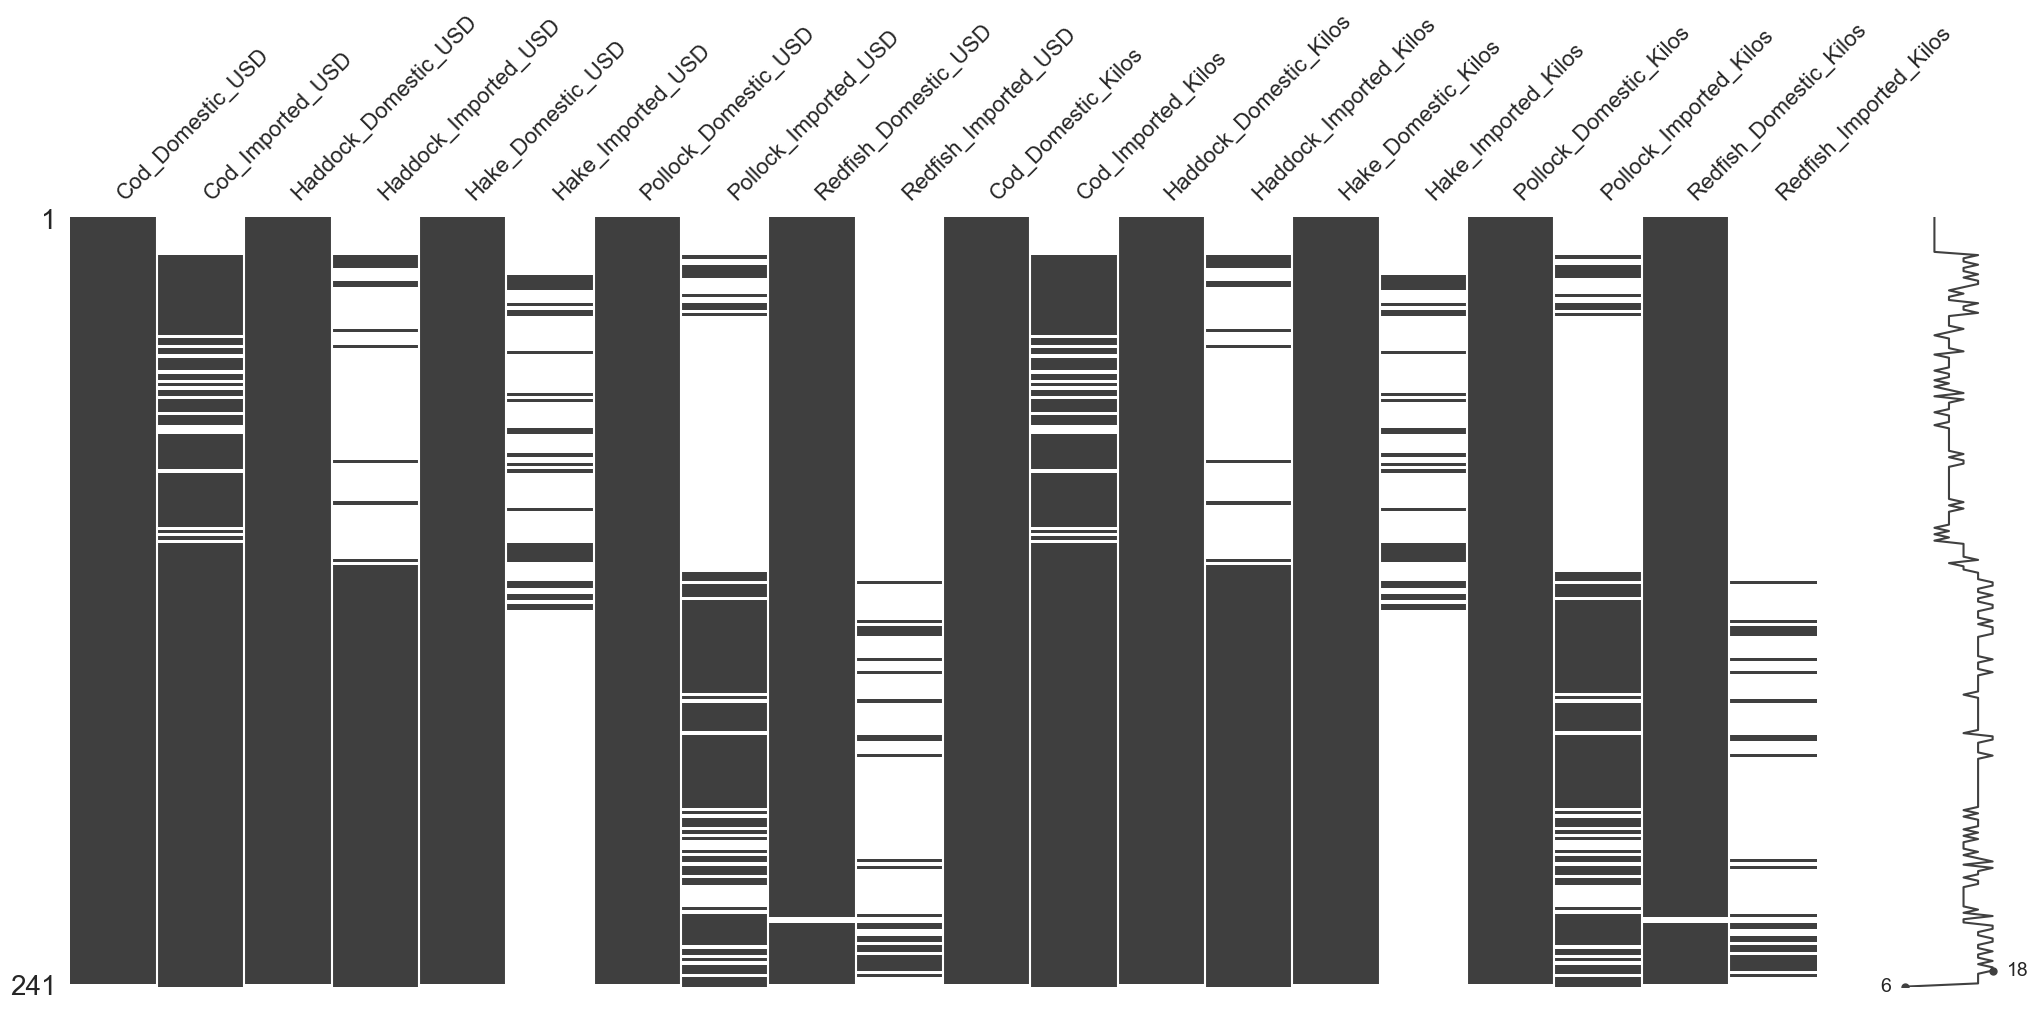

In [12]:
import missingno as msn



msn.matrix(df_combined)


In [13]:
# Filtering the DataFrame for a range of periods
start_period = pd.Period('2014-01', freq='M')
end_period = pd.Period('2024-04', freq='M')
filtered_df_range = df_combined[(df_combined.index >= start_period) & (df_combined.index <= end_period)].copy()


<Axes: >

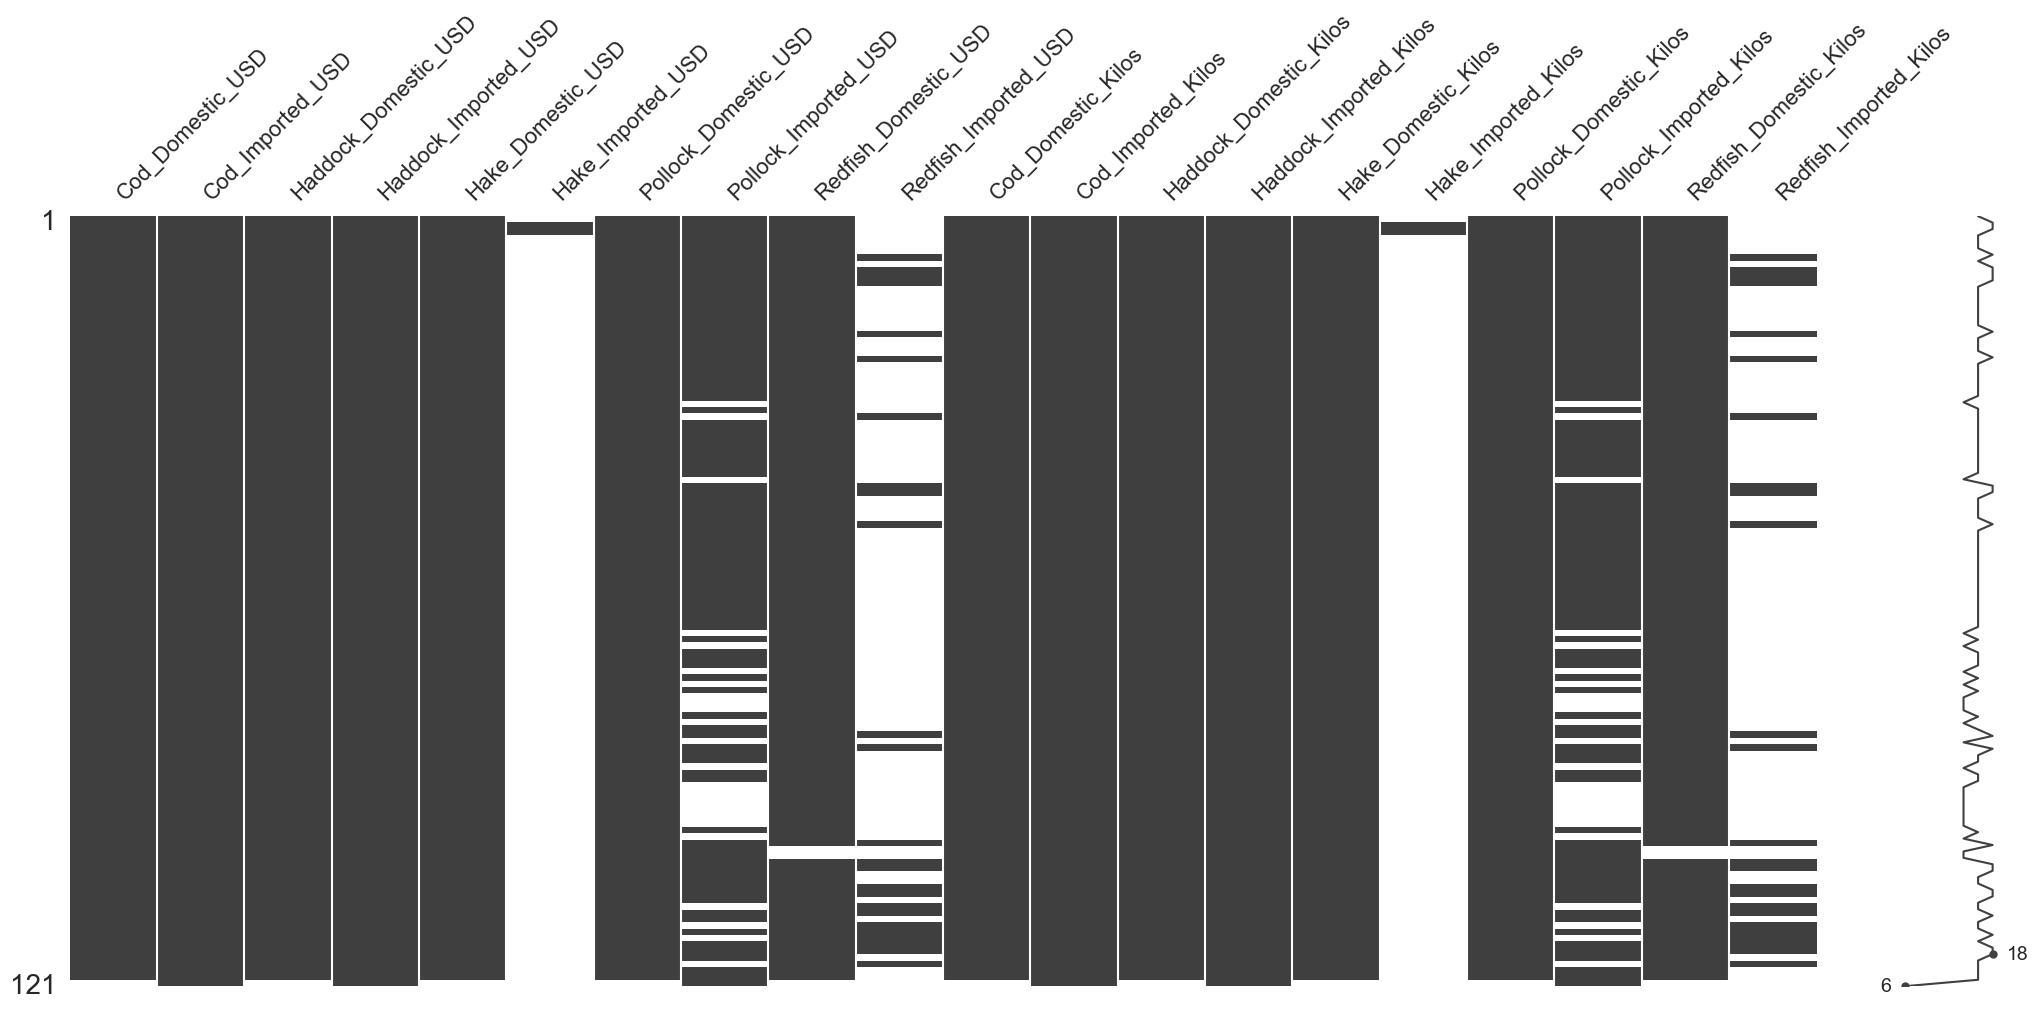

In [14]:
msn.matrix(filtered_df_range)

<Axes: >

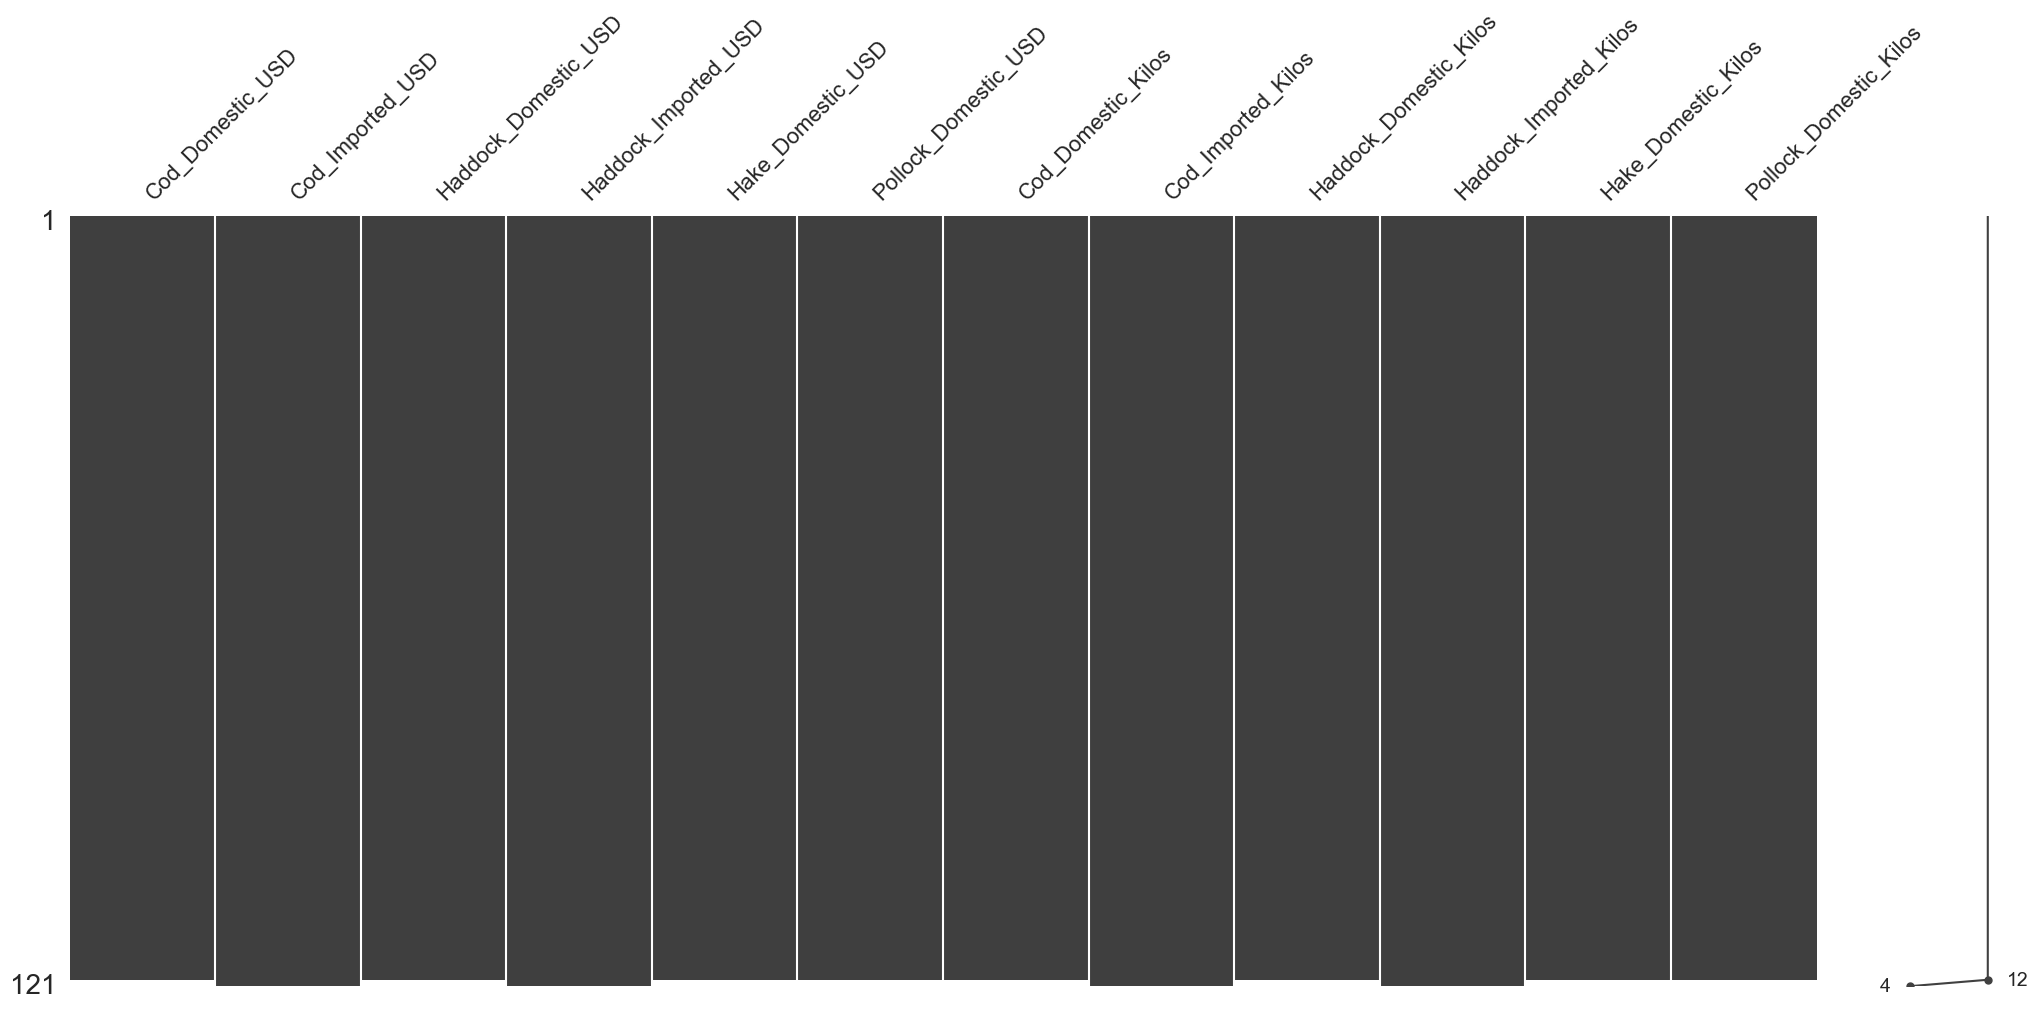

In [15]:
filtered_df_range = filtered_df_range.drop(['Hake_Imported_USD', 'Hake_Imported_Kilos', 'Redfish_Imported_USD', 'Redfish_Domestic_USD', 'Redfish_Domestic_Kilos', 'Redfish_Imported_Kilos', 'Pollock_Imported_USD', 'Pollock_Imported_Kilos'], axis=1)
msn.matrix(filtered_df_range)

<Axes: >

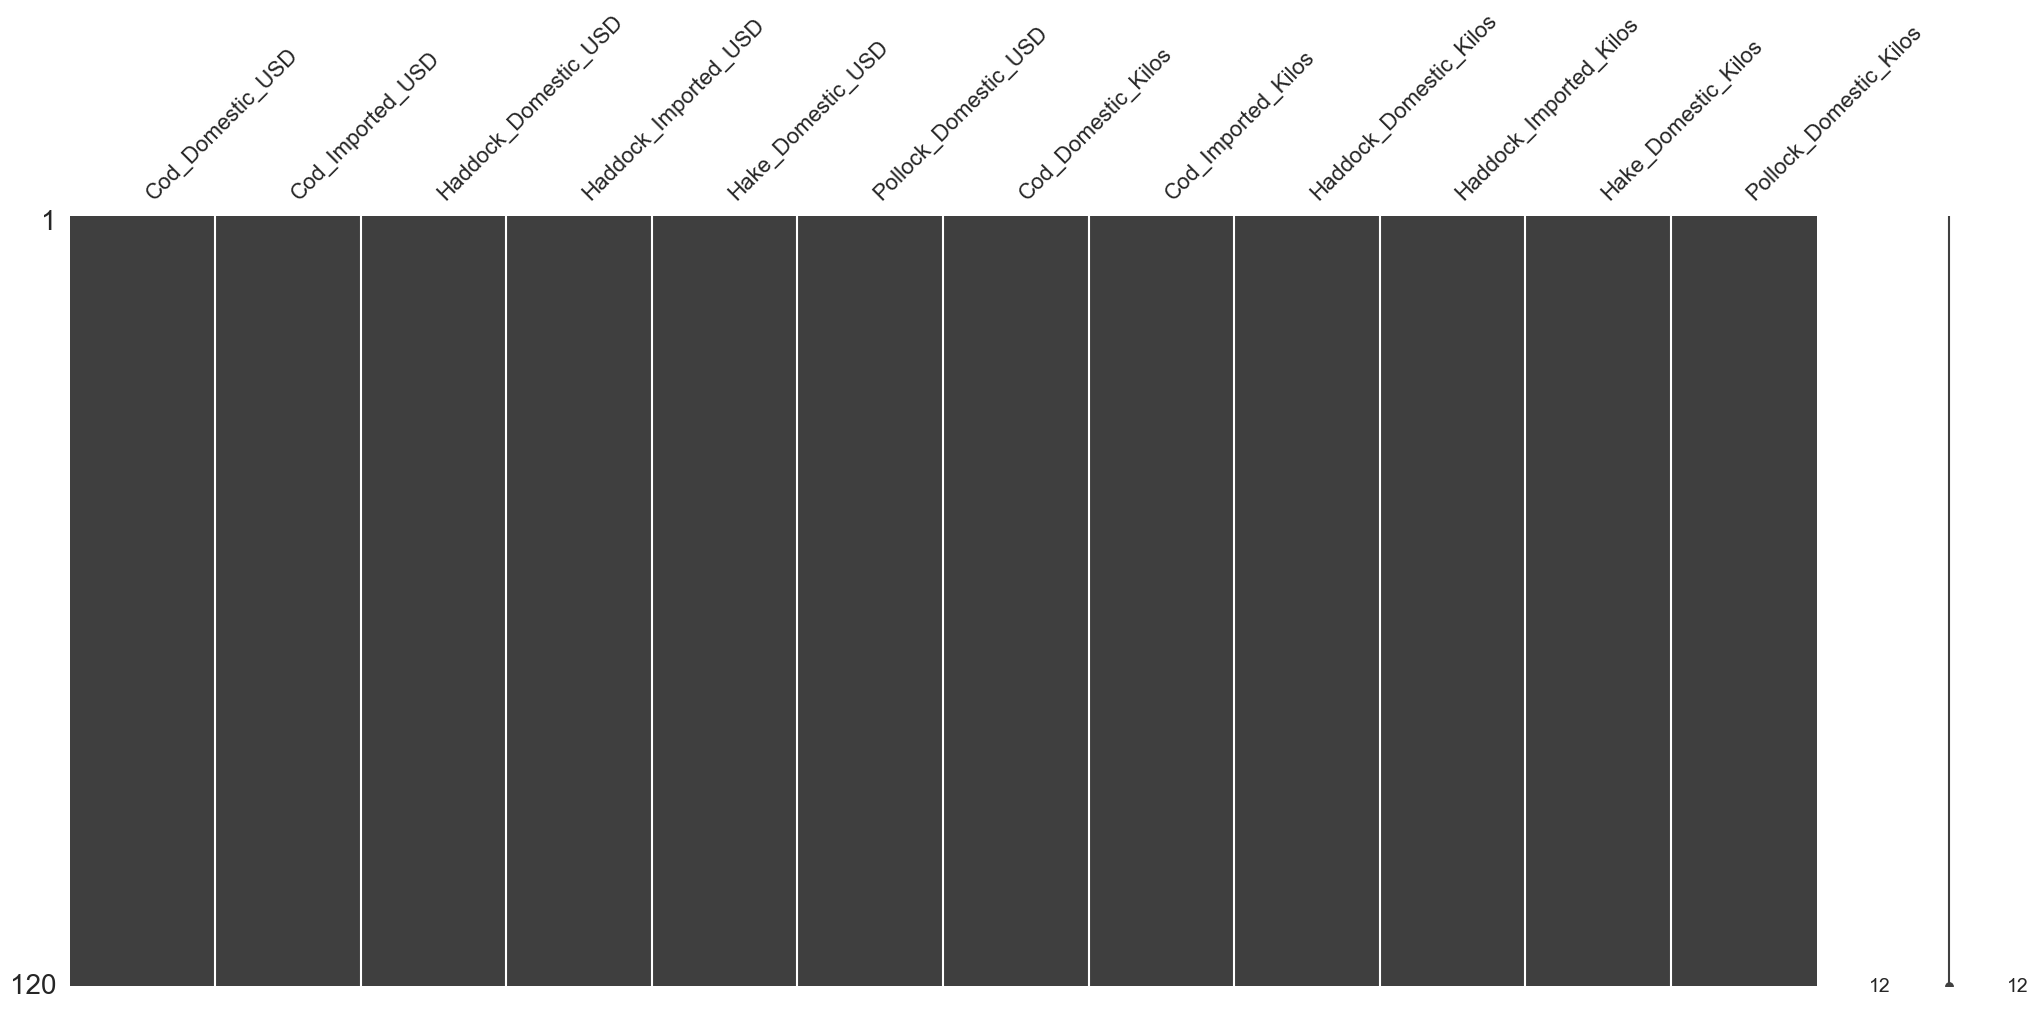

In [16]:
filtered_df_range.dropna(axis=0, inplace=True)
msn.matrix(filtered_df_range)

In [17]:
filtered_df_range

,Cod_Domestic_USD,Cod_Imported_USD,Haddock_Domestic_USD,Haddock_Imported_USD,Hake_Domestic_USD,Pollock_Domestic_USD,Cod_Domestic_Kilos,Cod_Imported_Kilos,Haddock_Domestic_Kilos,Haddock_Imported_Kilos,Hake_Domestic_Kilos,Pollock_Domestic_Kilos
YYYY/MM,,,,,,,,,,,,
2014-01,6.564277,5.432189,3.632076,6.062704,5.390747,2.754788,7432.119821,666875.0,9168.473478,986961.0,6832.923588,66263.573768
2014-02,4.724613,5.419307,4.505383,6.705129,4.184428,2.851862,7751.902822,1544561.0,10325.588990,1572642.0,14266.404188,51092.705319
2014-03,4.780944,5.997028,3.940501,7.122593,3.514896,1.946293,15547.804157,542614.0,9085.012383,1055480.0,16194.627646,63148.751259
2014-04,7.160816,6.205559,2.925727,6.930993,6.402688,3.191612,12556.358919,798162.0,9904.654770,838927.0,10549.663888,102511.997532
2014-05,5.588681,6.634645,5.245029,7.691731,5.082652,3.245136,12018.397728,721343.0,1657.882084,469437.0,21690.359336,52843.120356
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08,8.296003,12.221665,5.058450,7.029182,5.381039,6.132687,892.670846,328612.0,14791.664777,318297.0,16448.186082,2896.190727
2023-09,7.832365,10.271607,4.656625,6.936796,5.330927,6.659265,982.482242,550803.0,12261.069935,435693.0,15318.286145,2497.936152
2023-10,5.584164,11.177861,4.012876,6.809827,3.343172,5.567629,2737.886801,378040.0,10651.722292,485924.0,13815.986429,14582.558445


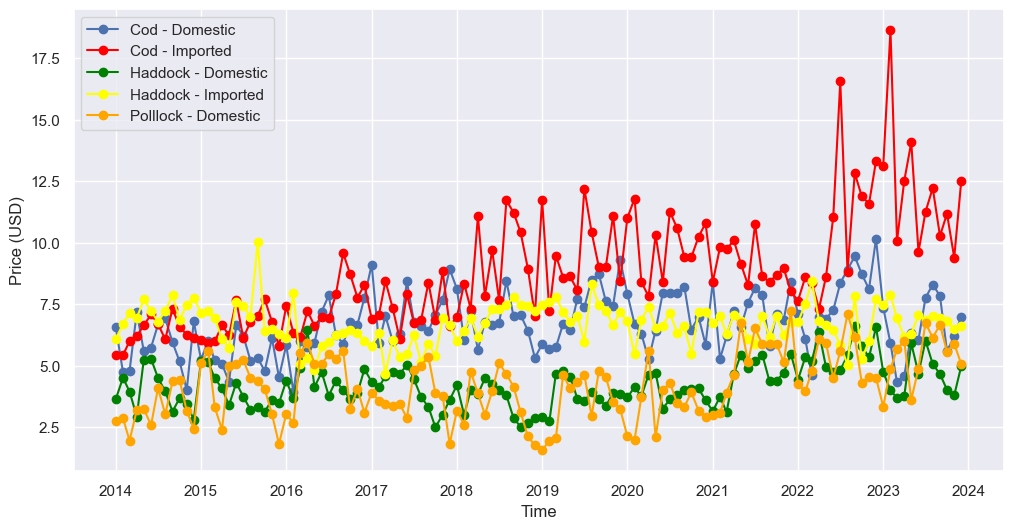

In [18]:
plt.plot(filtered_df_range.index.to_timestamp(), filtered_df_range.Cod_Domestic_USD, marker='o', label='Cod - Domestic')
plt.plot(filtered_df_range.index.to_timestamp(), filtered_df_range.Cod_Imported_USD, marker='o', color='red', label='Cod - Imported')
plt.plot(filtered_df_range.index.to_timestamp(), filtered_df_range.Haddock_Domestic_USD, marker='o', color='green', label='Haddock - Domestic')
plt.plot(filtered_df_range.index.to_timestamp(), filtered_df_range.Haddock_Imported_USD, marker='o', color='yellow', label='Haddock - Imported')
plt.plot(filtered_df_range.index.to_timestamp(), filtered_df_range.Pollock_Domestic_USD, marker='o', color='orange', label='Polllock - Domestic')
#plt.plot(filtered_df_range.index.to_timestamp(), filtered_df_range.Pollock_Imported, marker='o', color='purple', label='Pollock - Imported')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.show();

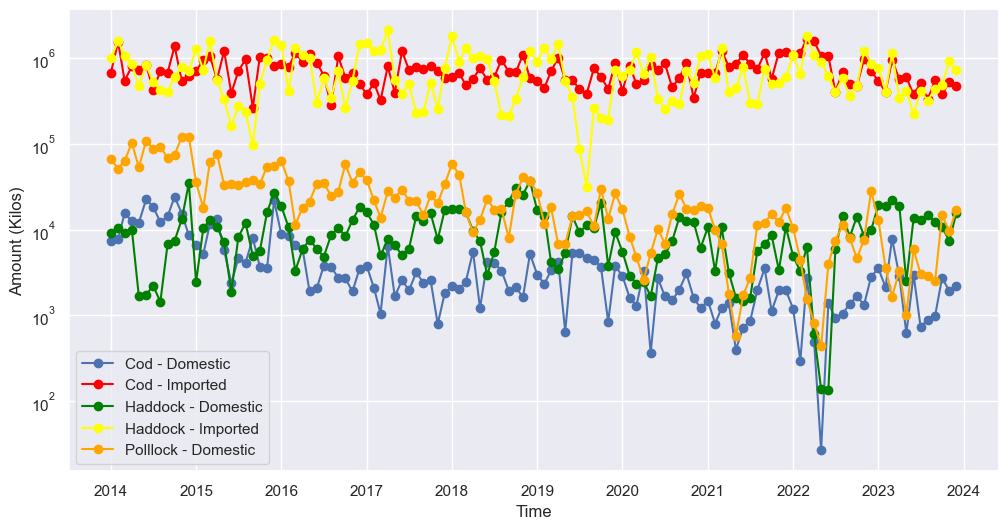

In [19]:
plt.plot(filtered_df_range.index.to_timestamp(), filtered_df_range.Cod_Domestic_Kilos, marker='o', label='Cod - Domestic')
plt.plot(filtered_df_range.index.to_timestamp(), filtered_df_range.Cod_Imported_Kilos, marker='o', color='red', label='Cod - Imported')
plt.plot(filtered_df_range.index.to_timestamp(), filtered_df_range.Haddock_Domestic_Kilos, marker='o', color='green', label='Haddock - Domestic')
plt.plot(filtered_df_range.index.to_timestamp(), filtered_df_range.Haddock_Imported_Kilos, marker='o', color='yellow', label='Haddock - Imported')
plt.plot(filtered_df_range.index.to_timestamp(), filtered_df_range.Pollock_Domestic_Kilos, marker='o', color='orange', label='Polllock - Domestic')
#plt.plot(filtered_df_range.index.to_timestamp(), filtered_df_range.Pollock_Imported, marker='o', color='purple', label='Pollock - Imported')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Amount (Kilos)')
plt.yscale('log')
plt.show();

# Pearson Correlations

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0.5, 0, 'Cod_Domestic_USD'),
  Text(1.5, 0, 'Cod_Imported_USD'),
  Text(2.5, 0, 'Haddock_Domestic_USD'),
  Text(3.5, 0, 'Haddock_Imported_USD'),
  Text(4.5, 0, 'Hake_Domestic_USD'),
  Text(5.5, 0, 'Pollock_Domestic_USD'),
  Text(6.5, 0, 'Cod_Domestic_Kilos'),
  Text(7.5, 0, 'Cod_Imported_Kilos'),
  Text(8.5, 0, 'Haddock_Domestic_Kilos'),
  Text(9.5, 0, 'Haddock_Imported_Kilos'),
  Text(10.5, 0, 'Hake_Domestic_Kilos'),
  Text(11.5, 0, 'Pollock_Domestic_Kilos')])

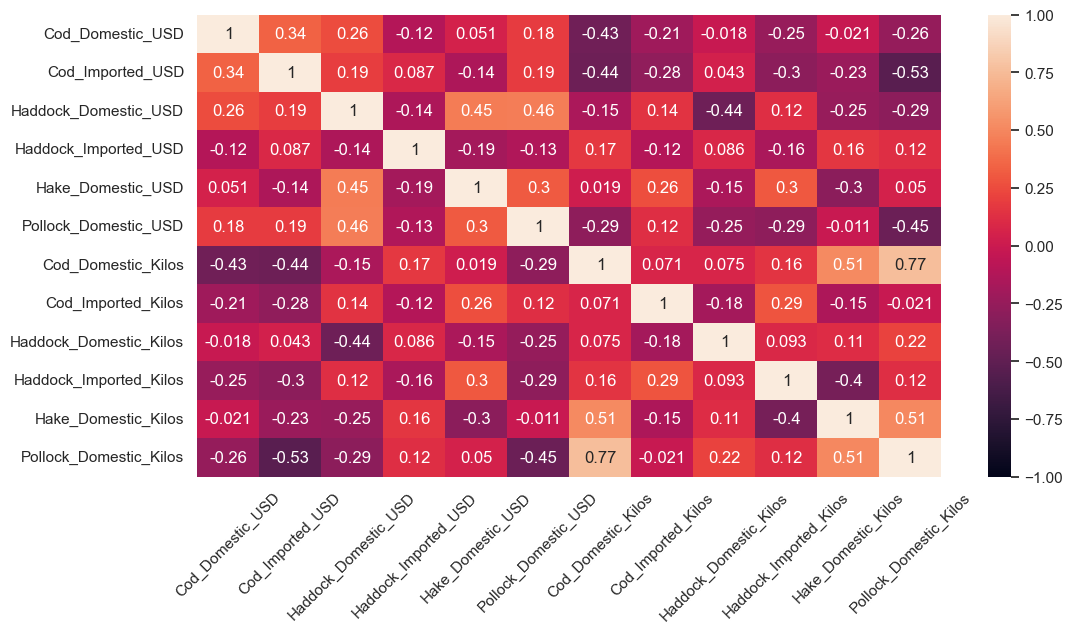

In [20]:
sns.heatmap(filtered_df_range.corr(), vmin=-1, vmax=1, annot=True)
plt.xticks(rotation=45)

In [21]:
correlation = filtered_df_range.Haddock_Imported_USD.corr(filtered_df_range.Pollock_Domestic_USD)
correlation

-0.1305238295717277

In [22]:
correlation = filtered_df_range.Cod_Imported_USD.corr(filtered_df_range.Pollock_Domestic_USD)
correlation

0.18517134419415146

In [23]:
correlation = filtered_df_range.Cod_Imported_USD.corr(filtered_df_range.Haddock_Imported_USD)
correlation

0.08697008430134935

# Pairplots

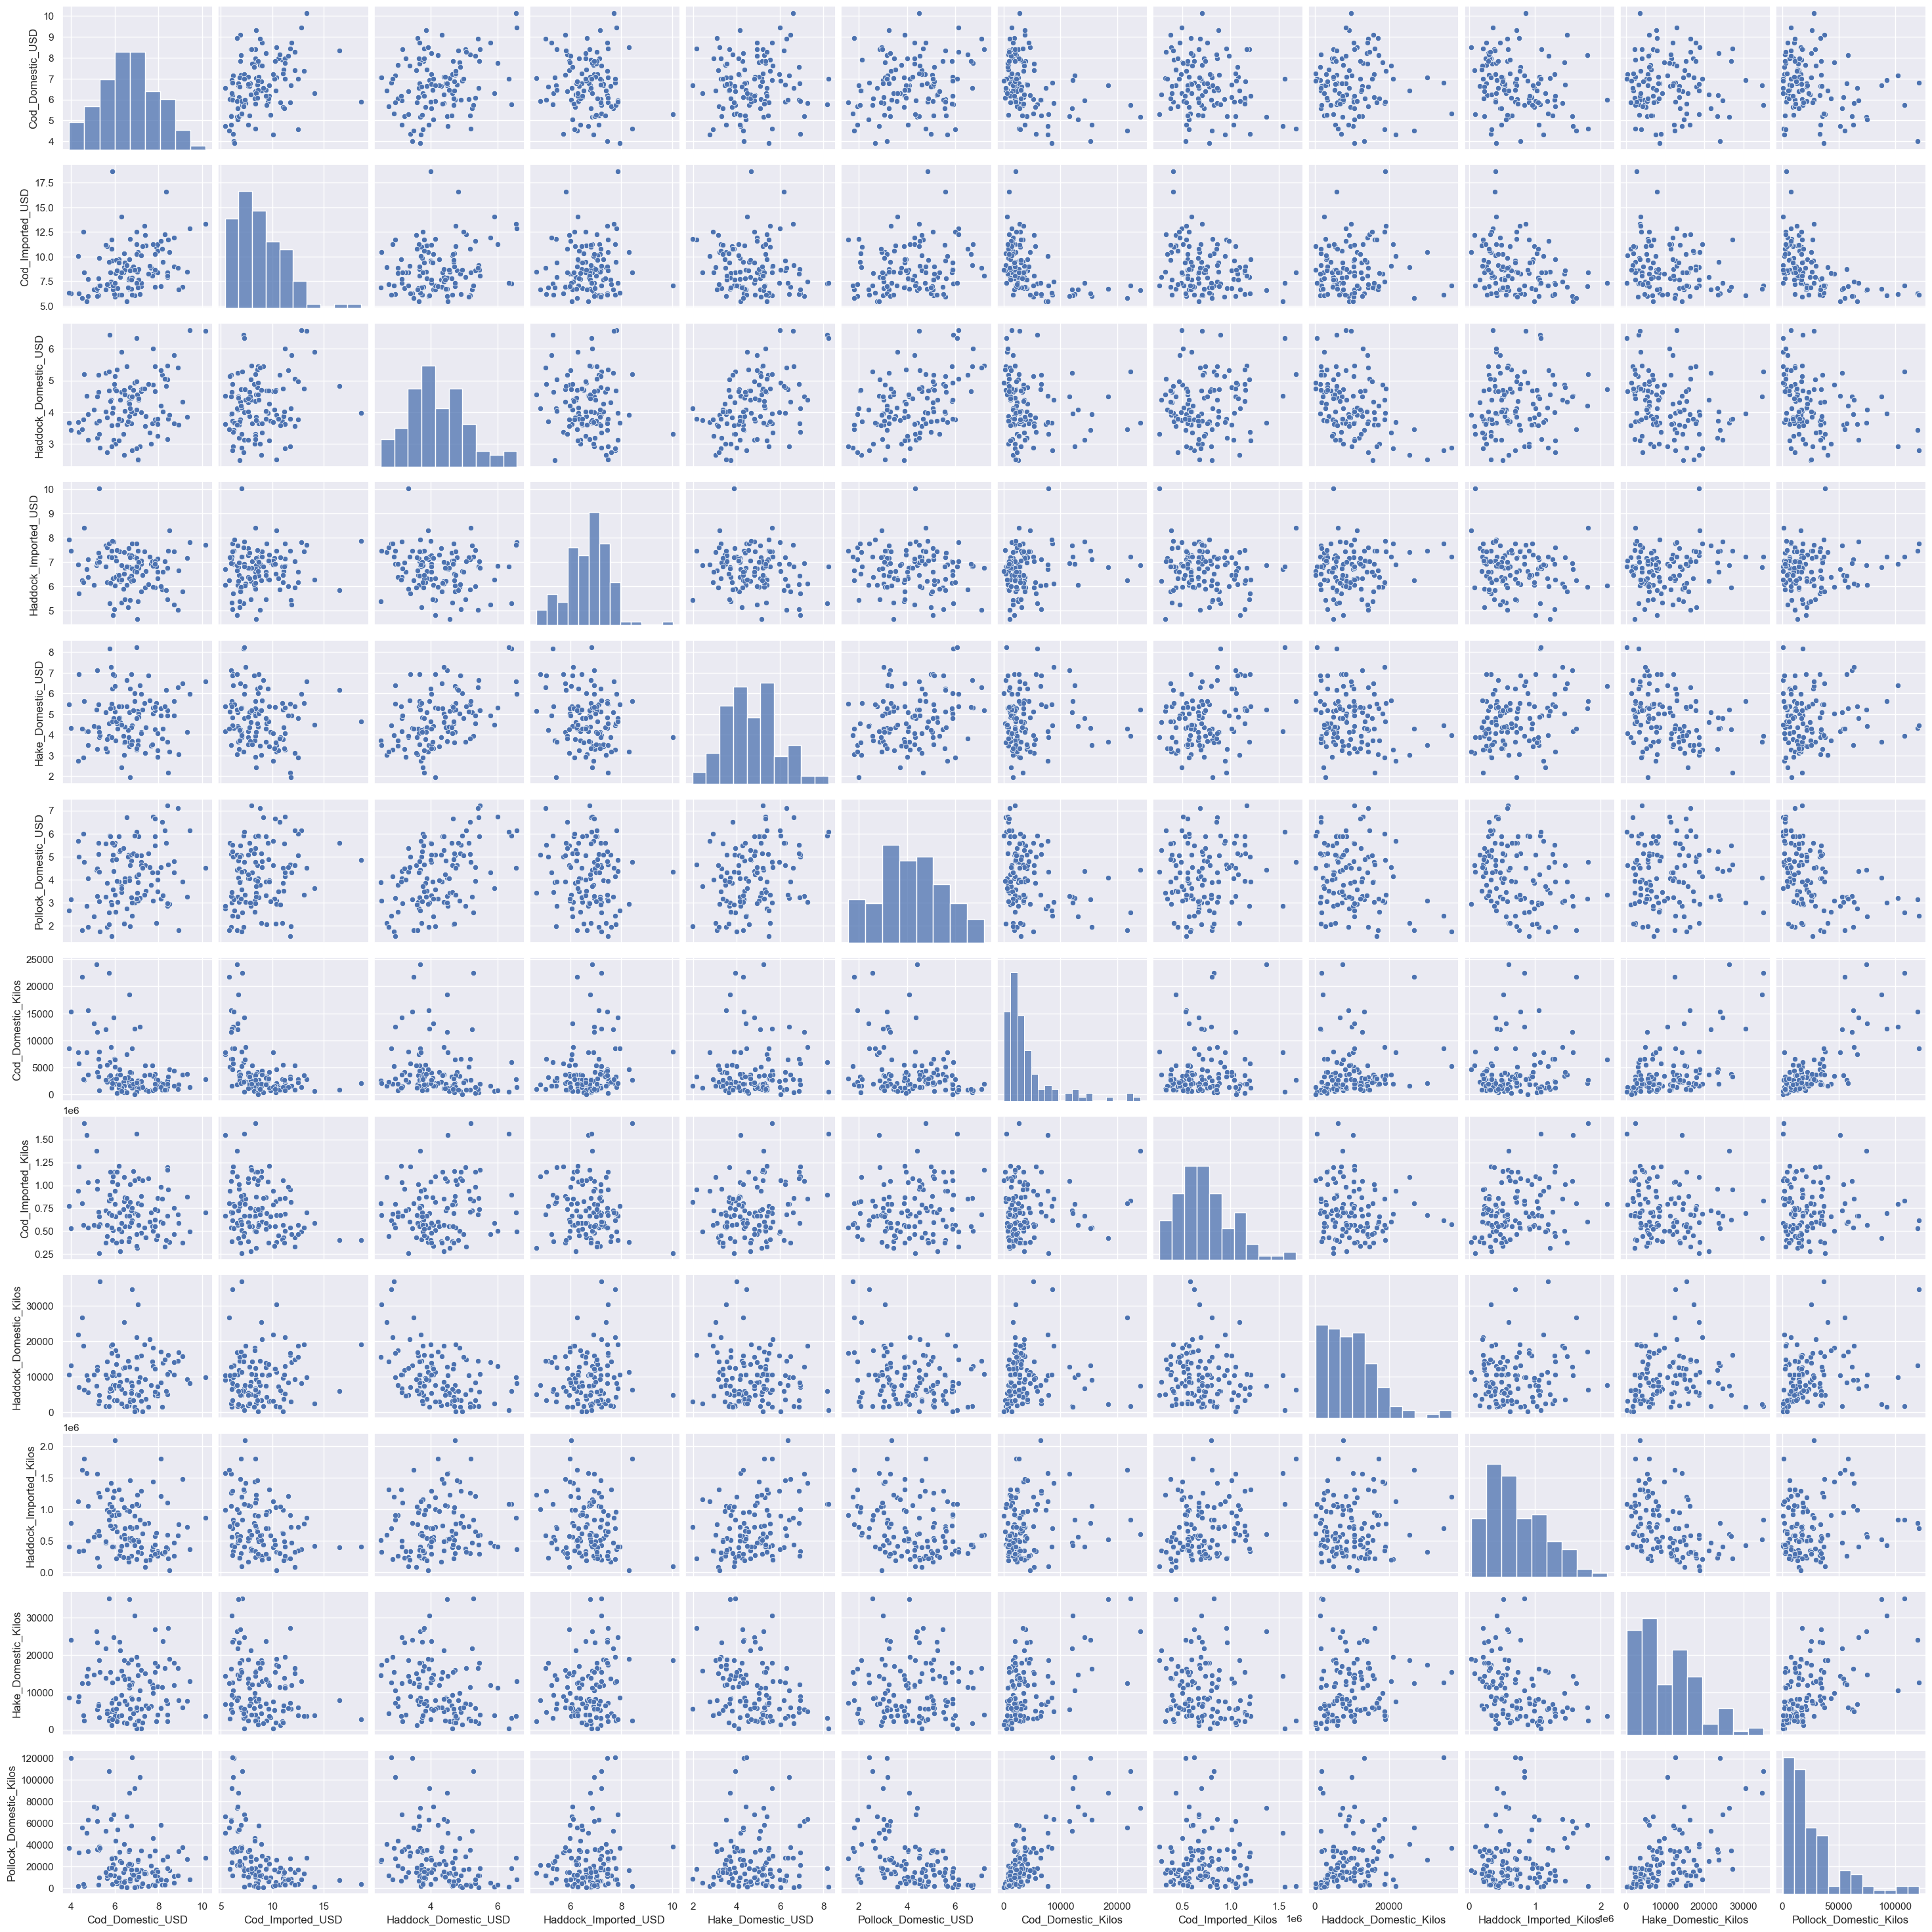

In [24]:
sns.pairplot(data=filtered_df_range)

# Feature Matrix and Target Vector

In [25]:
cols = filtered_df_range.columns
X_cols = cols.drop('Pollock_Domestic_USD')
X = filtered_df_range[X_cols]
y = filtered_df_range[['Pollock_Domestic_USD']]


# Regressions

## Simple Linear Regression

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
X_simple = X[['Cod_Imported_USD']]

model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X_simple, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
residuals = y_test - y_pred

score = model.score(X_test, y_test)

# Calculate and print coefficients
print("Model score:", score)

# Calculate and print the intercept
print("Intercept:", model.intercept_)

# Calculate and print the mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Model score: 0.05153296553624753
Intercept: [3.22287768]
Mean Squared Error: 1.716557419920002
R-squared: 0.05153296553624753


## Multi LinearRegression

### Scaling

In [28]:

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [29]:
# multi linear regression

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
residuals = y_test - y_pred

score = model.score(X_test, y_test)

# Calculate and print coefficients
print("Model score:", score)

# Calculate and print the intercept
print("Intercept:", model.intercept_)

# Calculate and print the mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)


Model score: 0.36544965332065293
Intercept: [4.18775477]
Mean Squared Error: 1.1484237894689533
R-squared: 0.36544965332065293


In [30]:
coef_df = pd.DataFrame(model.coef_.ravel(), X.columns, columns=['Coefficients'])
print(coef_df)


                        Coefficients
Cod_Domestic_USD           -0.097819
Cod_Imported_USD           -0.257229
Haddock_Domestic_USD        0.406009
Haddock_Imported_USD       -0.115057
Hake_Domestic_USD           0.449903
Cod_Domestic_Kilos          0.091706
Cod_Imported_Kilos          0.045988
Haddock_Domestic_Kilos     -0.020984
Haddock_Imported_Kilos     -0.394096
Hake_Domestic_Kilos         0.467548
Pollock_Domestic_Kilos     -1.032822


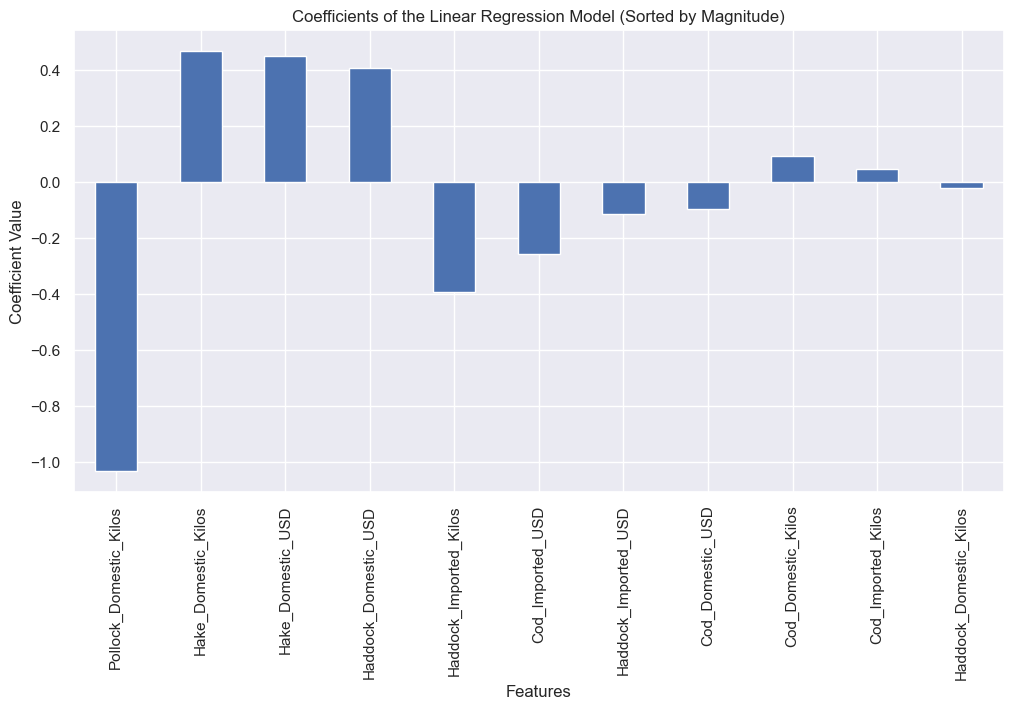

In [31]:
coef_df['Abs_Coefficients'] = coef_df['Coefficients'].abs()
sorted_coef_df = coef_df.sort_values(by='Abs_Coefficients', ascending=False)
sorted_coef_df['Coefficients'].plot(kind='bar', legend=False)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Coefficients of the Linear Regression Model (Sorted by Magnitude)')
plt.show()

## Ridge Regression

In [32]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)

# Fit the model to the training data
ridge_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ridge_model.predict(X_test)
residuals = y_test - y_pred

# Evaluate
score = ridge_model.score(X_test, y_test)
print("Model score:", score)
print("Intercept:", ridge_model.intercept_)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Model score: 0.39419211612996874
Intercept: [4.18857684]
Mean Squared Error: 1.0964050202241153
R-squared: 0.39419211612996874


                        Coefficients
Cod_Domestic_USD           -0.097362
Cod_Imported_USD           -0.238125
Haddock_Domestic_USD        0.408400
Haddock_Imported_USD       -0.111862
Hake_Domestic_USD           0.435197
Cod_Domestic_Kilos          0.069782
Cod_Imported_Kilos          0.051394
Haddock_Domestic_Kilos     -0.023863
Haddock_Imported_Kilos     -0.391185
Hake_Domestic_Kilos         0.448652
Pollock_Domestic_Kilos     -0.977998


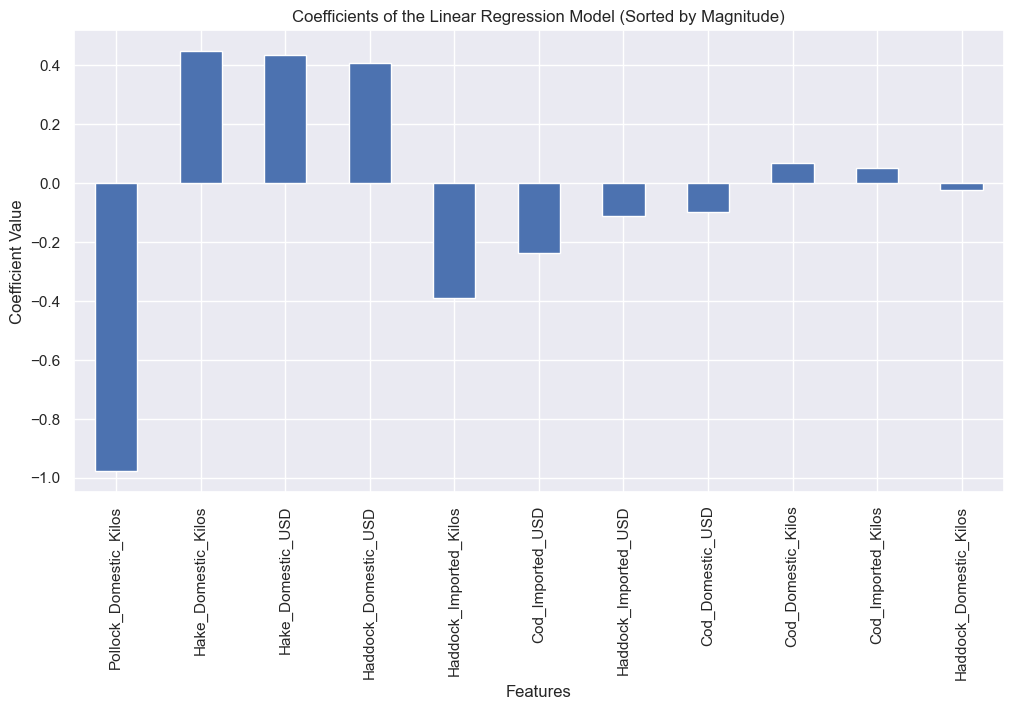

In [33]:
# make coef dataframe
coef_df = pd.DataFrame(ridge_model.coef_.ravel(), X.columns, columns=['Coefficients'])
print(coef_df)

# plot coefs
coef_df['Abs_Coefficients'] = coef_df['Coefficients'].abs()
sorted_coef_df = coef_df.sort_values(by='Abs_Coefficients', ascending=False)
sorted_coef_df['Coefficients'].plot(kind='bar', legend=False)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Coefficients of the Linear Regression Model (Sorted by Magnitude)')
plt.show()

## Ridge Regression Tuning

Best alpha: 9.82836333277001
Mean Squared Error with best alpha: 0.9030444674343117
R-squared: 0.5010316007627424
                        Coefficients
Cod_Domestic_USD           -0.077261
Cod_Imported_USD           -0.133824
Haddock_Domestic_USD        0.399044
Haddock_Imported_USD       -0.095919
Hake_Domestic_USD           0.348341
Cod_Domestic_Kilos         -0.027769
Cod_Imported_Kilos          0.077353
Haddock_Domestic_Kilos     -0.045746
Haddock_Imported_Kilos     -0.361871
Hake_Domestic_Kilos         0.331395
Pollock_Domestic_Kilos     -0.685988


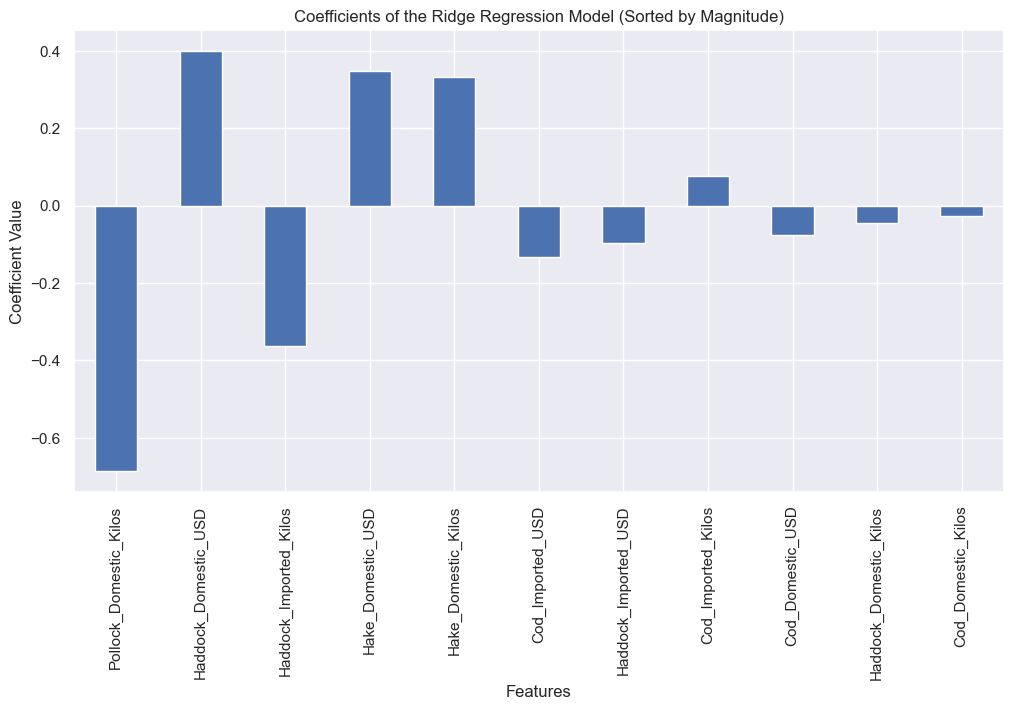

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Define the model
ridge = Ridge()

# Params for gridsearch
alphas = np.logspace(-4, 2, 400)

# Define the grid search with cross-validation
grid = GridSearchCV(estimator=ridge, param_grid={'alpha': alphas}, scoring='r2', cv=5, return_train_score=True)

# Fit the grid search to the data
grid.fit(X_train, y_train)

# Get the best alpha
best_alpha = grid.best_params_['alpha']
print("Best alpha:", best_alpha)

# Refit the Ridge model with the best alpha
ridge_best = Ridge(alpha=best_alpha)
ridge_best.fit(X_train, y_train)

# Get results dict
results_df = pd.DataFrame(grid.cv_results_)

# Evaluate the model
y_pred = ridge_best.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error with best alpha:", mse)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

coef_df = pd.DataFrame(ridge_best.coef_.ravel(), X.columns, columns=['Coefficients'])
print(coef_df)

coef_df['Abs_Coefficients'] = coef_df['Coefficients'].abs()
sorted_coef_df = coef_df.sort_values(by='Abs_Coefficients', ascending=False)
sorted_coef_df['Coefficients'].plot(kind='bar', legend=False)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Coefficients of the Ridge Regression Model (Sorted by Magnitude)')
plt.show()


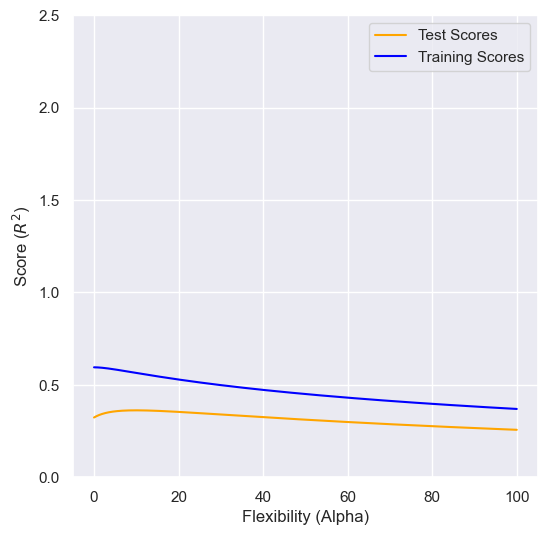

In [42]:
plt.figure(figsize=(6,6))
plt.plot(results_df['param_alpha'], results_df[['mean_test_score']], label='Test Scores', c='orange')
plt.plot(results_df['param_alpha'], results_df[['mean_train_score']], label='Training Scores', c='blue')
plt.xlabel('Flexibility (Alpha)')
plt.ylabel(r'Score ($R^2$)')
plt.ylim(0, 2.5)
plt.legend()
plt.show();



## Lasso Regression

Best alpha: 0.032082312454210775
Mean Squared Error with best alpha: 1.1465684108856105
R-squared: 0.3664748246329139
                        Coefficients
Cod_Domestic_USD           -0.097818
Cod_Imported_USD           -0.256578
Haddock_Domestic_USD        0.406108
Haddock_Imported_USD       -0.114946
Hake_Domestic_USD           0.449407
Cod_Domestic_Kilos          0.090940
Cod_Imported_Kilos          0.046174
Haddock_Domestic_Kilos     -0.021077
Haddock_Imported_Kilos     -0.394005
Hake_Domestic_Kilos         0.466915
Pollock_Domestic_Kilos     -1.030947


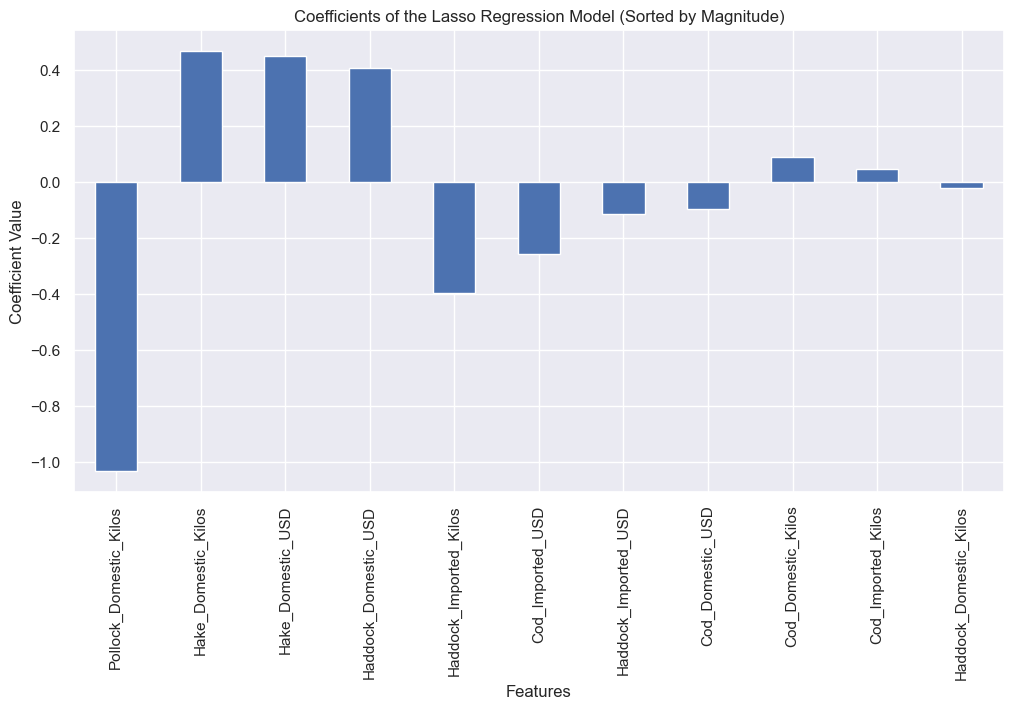

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

# Define the model
lasso = Lasso()

# Params for gridsearch
alphas = np.logspace(-4, 0, 400)

# Define the grid search with cross-validation
grid = GridSearchCV(estimator=lasso, param_grid={'alpha': alphas}, scoring='r2', cv=5, return_train_score=True)

# Fit the grid search to the data
grid.fit(X_train, y_train)

# Get the best alpha
best_alpha = grid.best_params_['alpha']
print("Best alpha:", best_alpha)

# Refit the Ridge model with the best alpha
lasso_best = Ridge(alpha=best_alpha)
lasso_best.fit(X_train, y_train)

# Get results dict
results_df = pd.DataFrame(grid.cv_results_)

# Evaluate the model
y_pred = lasso_best.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error with best alpha:", mse)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)


coef_df = pd.DataFrame(lasso_best.coef_.ravel(), X.columns, columns=['Coefficients'])
print(coef_df)

coef_df['Abs_Coefficients'] = coef_df['Coefficients'].abs()
sorted_coef_df = coef_df.sort_values(by='Abs_Coefficients', ascending=False)
sorted_coef_df['Coefficients'].plot(kind='bar', legend=False)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Coefficients of the Lasso Regression Model (Sorted by Magnitude)')
plt.show()


In [37]:
results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001075,0.000276,0.000651,0.000082,0.0001,{'alpha': 0.0001},0.207578,0.527969,-0.204933,0.350218,...,0.323124,0.317602,285,0.626184,0.563683,0.678518,0.599382,0.504651,0.594484,0.058497
1,0.000800,0.000065,0.000555,0.000017,0.000102,{'alpha': 0.00010233520470972575},0.207579,0.527975,-0.204919,0.350217,...,0.323128,0.317599,284,0.626184,0.563683,0.678518,0.599382,0.504651,0.594484,0.058497
2,0.000760,0.000031,0.000560,0.000042,0.000105,{'alpha': 0.00010472494122981487},0.207579,0.527981,-0.204904,0.350216,...,0.323132,0.317595,283,0.626184,0.563683,0.678518,0.599382,0.504651,0.594484,0.058497
3,0.000830,0.000114,0.000575,0.000029,0.000107,{'alpha': 0.00010717048298967114},0.207580,0.527988,-0.204888,0.350214,...,0.323137,0.317591,282,0.626184,0.563683,0.678518,0.599382,0.504651,0.594484,0.058497
4,0.000781,0.000059,0.000551,0.000028,0.00011,{'alpha': 0.00010967313315588178},0.207580,0.527995,-0.204873,0.350212,...,0.323142,0.317588,281,0.626184,0.563683,0.678518,0.599382,0.504651,0.594484,0.058497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.000682,0.000004,0.000525,0.000004,0.9118,{'alpha': 0.9118003390845681},-0.004393,-0.039109,-0.099851,-0.004603,...,-0.031638,0.036442,384,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
396,0.000703,0.000018,0.000533,0.000007,0.933093,{'alpha': 0.9330927435461663},-0.004393,-0.039109,-0.099851,-0.004603,...,-0.031638,0.036442,384,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
397,0.000696,0.000015,0.000528,0.000004,0.954882,{'alpha': 0.9548823692395657},-0.004393,-0.039109,-0.099851,-0.004603,...,-0.031638,0.036442,384,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
398,0.000694,0.000016,0.000539,0.000027,0.977181,{'alpha': 0.9771808272983898},-0.004393,-0.039109,-0.099851,-0.004603,...,-0.031638,0.036442,384,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


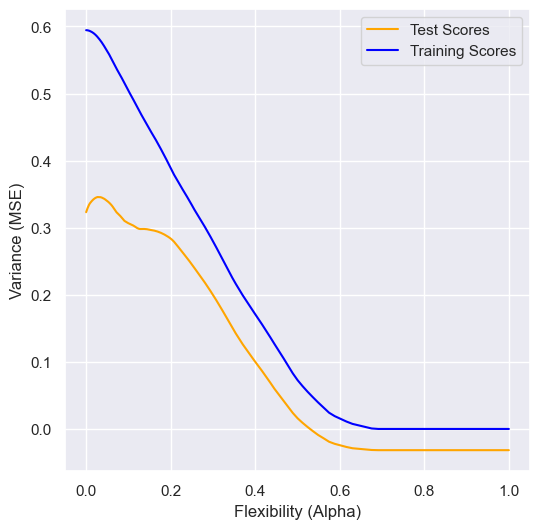

In [40]:
plt.figure(figsize=(6,6))
plt.plot(results_df['param_alpha'], results_df[['mean_test_score']], label='Test Scores', c='orange')
plt.plot(results_df['param_alpha'], results_df[['mean_train_score']], label='Training Scores', c='blue')
plt.xlabel('Flexibility (Alpha)')
plt.ylabel('Variance (MSE)')
#plt.ylim(0, 2.5)
plt.legend()
plt.show();